##importing modules

In [75]:
import numpy as np
import holidays
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt



## loading the data

In [96]:
df=pd.read_csv('accident.csv', encoding='latin-1')
df=df[['STATENAME','VE_FORMS', 'PERSONS', 'MONTH', 'MONTHNAME', 'DAY', 'DAY_WEEKNAME', 'YEAR', 'HOUR', 'MINUTE',
       'HOURNAME', 'ROUTE', 'ROUTENAME','TYP_INT', 'LGT_COND','WEATHERNAME','RAIL', 'SCH_BUS', 'NOT_HOUR', 'NOT_HOURNAME', 'FATALS']]

Data Description(as from FARS Manual)-

STATENAME: The state in which the fatal crash occurred.

VE_FORMS: Represents the number of vehicle forms involved in the crash. Each vehicle involved has its own form​

PERSONS: The number of people involved in the crash, including drivers, passengers, and pedestrians​

MONTH: The numeric value representing the month of the crash, ranging from 1 (January) to 12 (December)​

MONTHNAME: The name of the month when the crash occurred (e.g., January).

DAY: The day of the month when the crash occurred​

DAY_WEEKNAME: The name of the day of the week when the crash occurred (e.g., Monday).

YEAR: The year when the crash occurred.

HOUR: The hour of the day when the crash occurred, recorded in 24-hour military time​

MINUTE: The minute of the crash within the hour​

HOURNAME: The time range (in standard format) in which the crash occurred, e.g., "12:00pm-12:59pm."

ROUTE: The type of road on which the crash occurred, such as a state highway or interstate​

ROUTENAME: The specific name of the route, such as "US Highway."

TYP_INT: The type of intersection where the crash occurred. For example, whether the crash occurred at an interchange, non -junction, etc

LGT_COND: Light conditions at the time of the crash, such as daylight, darkness with streetlights, etc.(
1 Daylight
2 Dark – Not Lighted
3 Dark – Lighted
4 Dawn
5 Dusk
6 Dark – Unknown Lighting
7 Other
8 Not Reported
9 Reported as Unknown)

SCH_BUS: Indicates whether a school bus was involved in the crash (1 for yes, 2 for no)​

NOT_HOUR: The hour when authorities were notified of the crash​

NOT_HOURNAME: The name of the hour range during which authorities were notified.

FATALS: The number of fatalities resulting from the crash​




In [97]:
df.head()

,STATENAME,VE_FORMS,PERSONS,MONTH,MONTHNAME,DAY,DAY_WEEKNAME,YEAR,HOUR,MINUTE,...,ROUTE,ROUTENAME,TYP_INT,LGT_COND,WEATHERNAME,RAIL,SCH_BUS,NOT_HOUR,NOT_HOURNAME,FATALS
0,Alabama,2,3,1,January,1,Saturday,2022,12,30,...,2,US Highway,1,1,Clear,0000000,0,12,12:00pm-12:59pm,1
1,Alabama,2,5,1,January,1,Saturday,2022,16,40,...,2,US Highway,1,1,Clear,0000000,0,99,Unknown,2
2,Alabama,1,2,1,January,1,Saturday,2022,1,33,...,4,County Road,1,2,Cloudy,0000000,0,1,1:00am-1:59am,1
3,Alabama,1,1,1,January,2,Sunday,2022,14,46,...,1,Interstate,1,1,Cloudy,0000000,0,14,2:00pm-2:59pm,1
4,Alabama,1,1,1,January,2,Sunday,2022,18,48,...,1,Interstate,1,2,Rain,0000000,0,18,6:00pm-6:59pm,1


## cleaning and preprocessing

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STATENAME     39221 non-null  object
 1   VE_FORMS      39221 non-null  int64 
 2   PERSONS       39221 non-null  int64 
 3   MONTH         39221 non-null  int64 
 4   MONTHNAME     39221 non-null  object
 5   DAY           39221 non-null  int64 
 6   DAY_WEEKNAME  39221 non-null  object
 7   YEAR          39221 non-null  int64 
 8   HOUR          39221 non-null  int64 
 9   MINUTE        39221 non-null  int64 
 10  HOURNAME      39221 non-null  object
 11  ROUTE         39221 non-null  int64 
 12  ROUTENAME     39221 non-null  object
 13  TYP_INT       39221 non-null  int64 
 14  LGT_COND      39221 non-null  int64 
 15  WEATHERNAME   39221 non-null  object
 16  RAIL          39221 non-null  object
 17  SCH_BUS       39221 non-null  int64 
 18  NOT_HOUR      39221 non-null  int64 
 19  NOT_

In [108]:
df.describe()

,VE_FORMS,PERSONS,MONTH,DAY,YEAR,HOUR,MINUTE,ROUTE,TYP_INT,LGT_COND,SCH_BUS,NOT_HOUR,FATALS
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.0,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,1.542566,2.198006,6.695571,15.702430,2022.0,13.484128,29.306010,3.870044,1.840596,1.990388,0.002473,61.309477,1.083960
std,0.803742,1.778450,3.372055,8.825188,0.0,10.318867,18.386862,2.217890,6.829917,1.251489,0.049670,42.875681,0.347737
min,1.000000,0.000000,1.000000,1.000000,2022.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,4.000000,8.000000,2022.0,7.000000,14.000000,2.000000,1.000000,1.000000,0.000000,16.000000,1.000000
50%,1.000000,2.000000,7.000000,16.000000,2022.0,14.000000,30.000000,3.000000,1.000000,2.000000,0.000000,99.000000,1.000000
75%,2.000000,3.000000,10.000000,23.000000,2022.0,19.000000,45.000000,6.000000,2.000000,3.000000,0.000000,99.000000,1.000000
max,50.000000,128.000000,12.000000,31.000000,2022.0,99.000000,99.000000,9.000000,99.000000,9.000000,1.000000,99.000000,9.000000


In [109]:
df.dtypes

,0
STATENAME,object
VE_FORMS,int64
PERSONS,int64
MONTH,int64
MONTHNAME,object
DAY,int64
DAY_WEEKNAME,object
YEAR,int64
HOUR,int64
MINUTE,int64


In [99]:
df.isnull().sum()

,0
STATENAME,0
VE_FORMS,0
PERSONS,0
MONTH,0
MONTHNAME,0
DAY,0
DAY_WEEKNAME,0
YEAR,0
HOUR,0
MINUTE,0


no null values found in data

In [112]:
df.duplicated().sum()

0

In [113]:
df.drop_duplicates(inplace=True)

## EDA & visualizations:

following all the relevant graphs for visualizations and drawing insights/trends from the accidents data

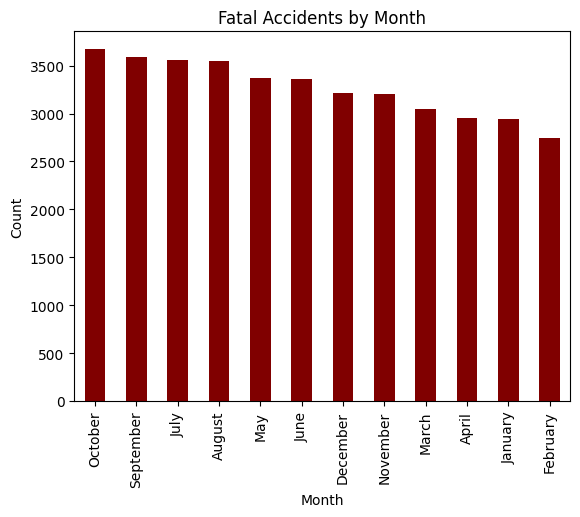

In [114]:
df['MONTHNAME'].value_counts().plot(kind='bar', color='maroon')
plt.title('Fatal Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


highest accidents has been observed over July-Oct depicting that Rainy season is a huge reason behind the accidents

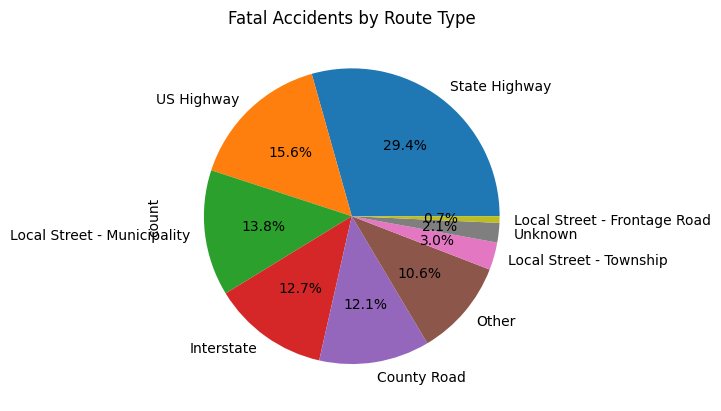

In [82]:
# Fatal Accidents by Route Type (Pie Chart)

df['ROUTENAME'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Fatal Accidents by Route Type')
plt.show()


majority of the accidents are observed on the highway areas

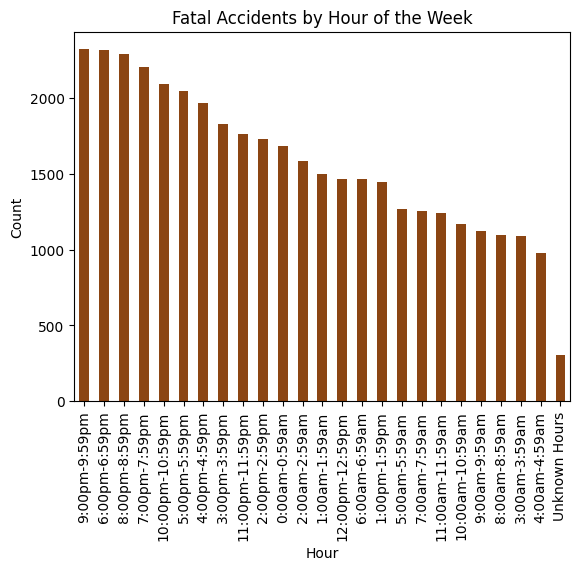

In [83]:
# Fatal Accidents by Hour of the Week (Bar Chart)

df['HOURNAME'].value_counts().plot(kind='bar', color= 'saddlebrown')
plt.title('Fatal Accidents by Hour of the Week')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()


most of the accidents tend to occur in the evening hours and at night as compared to the morning hours

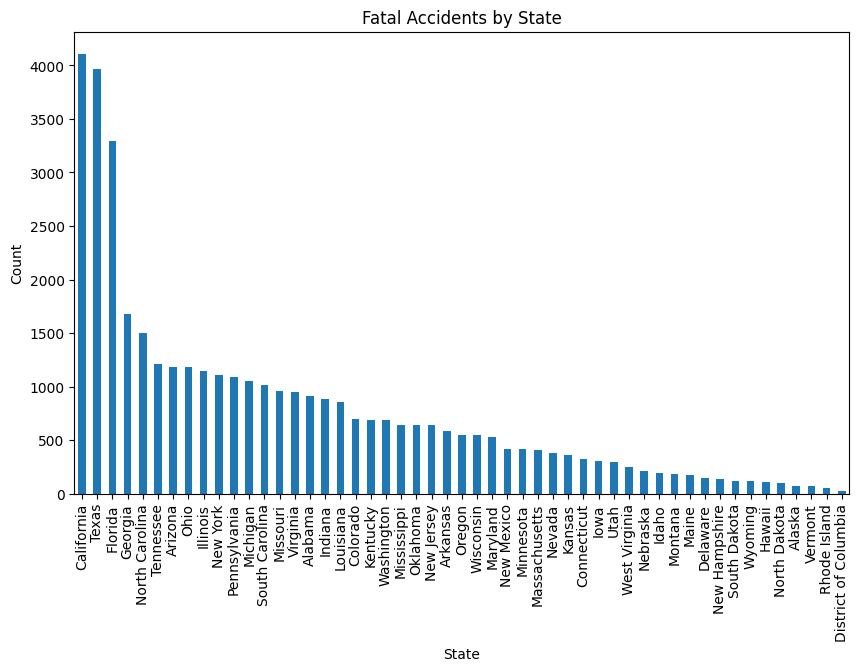

In [84]:
# Fatal Accidents by State (Bar Chart)

df['STATENAME'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Fatal Accidents by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()



the top 3 states depicting the hihgest rate of accidents are-


*   California
*   Texas
*   Florida





<ipython-input-85-b5cb5c5c1d80>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['LGT_COND'], palette='Set1')


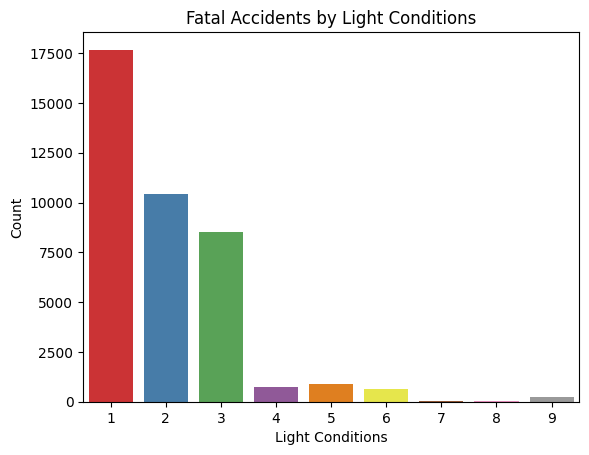

In [85]:
#  Fatal Accidents by Light Conditions (Bar Chart)

sns.countplot(x=df['LGT_COND'], palette='Set1')
plt.title('Fatal Accidents by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Count')
plt.show()


1 Daylight

2 Dark – Not Lighted

3 Dark – Lighted

4 Dawn

5 Dusk

6 Dark – Unknown Lighting

7 Other

8 Not Reported

9 Reported as Unknown

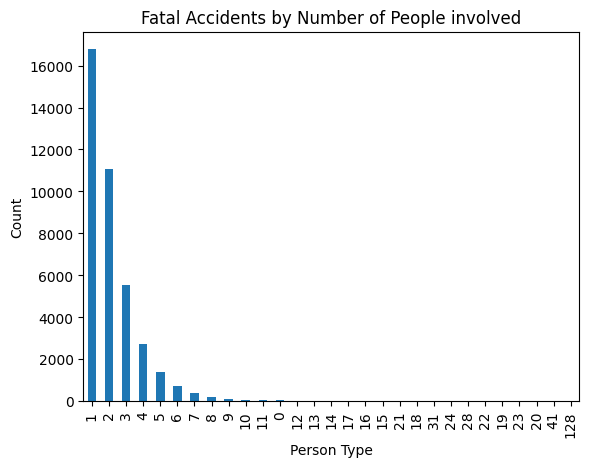

In [86]:
#  Fatal Accidents by Number of Person (Bar Chart)

df['PERSONS'].value_counts().plot(kind='bar')
plt.title('Fatal Accidents by Number of People involved')
plt.xlabel('Person Type')
plt.ylabel('Count')
plt.show()



mostly the accidents included 1-2 people

<ipython-input-87-d2ed415c8107>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='VE_FORMS', data=df, palette='Set3')


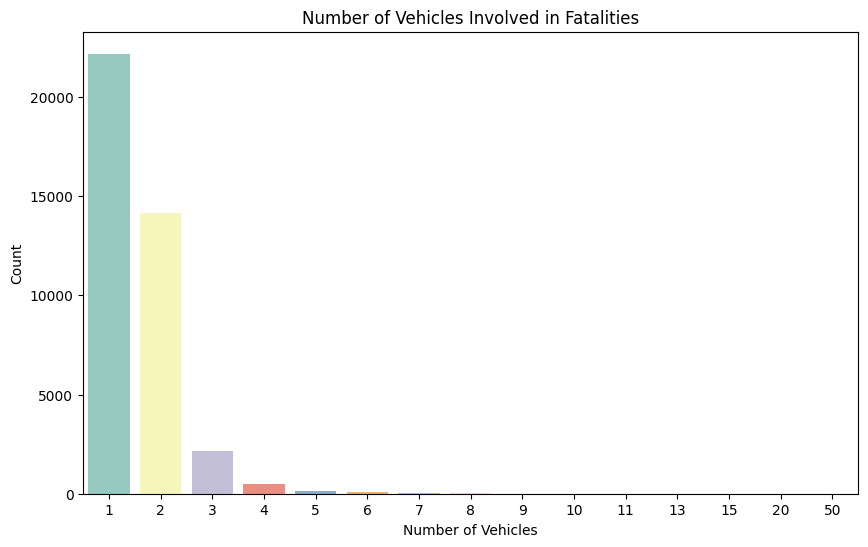

In [87]:
# Number of Vehicles Involved (VE_FORMS) in Fatalities
plt.figure(figsize=(10, 6))
sns.countplot(x='VE_FORMS', data=df, palette='Set3')
plt.title('Number of Vehicles Involved in Fatalities')
plt.xlabel('Number of Vehicles')
plt.ylabel('Count')
plt.show()

generally the accidents involved 1-2 vehicles

<ipython-input-103-dfd80d34040b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WEATHERNAME', data=df, palette='coolwarm', order=df['WEATHERNAME'].value_counts().index)


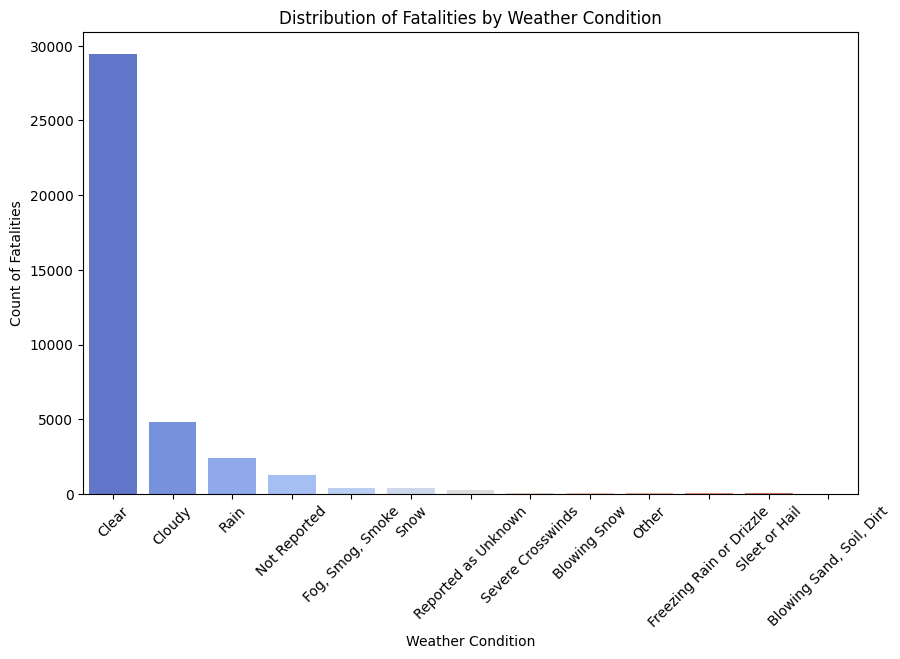

In [103]:
# Distribution of Fatalities by Weather Condition
plt.figure(figsize=(10, 6))
sns.countplot(x='WEATHERNAME', data=df, palette='coolwarm', order=df['WEATHERNAME'].value_counts().index)
plt.title('Distribution of Fatalities by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count of Fatalities')
plt.xticks(rotation=45)
plt.show()

large number of accidents took place under clear sky which says that bd weather conditions weren't that big of a reason for accidents

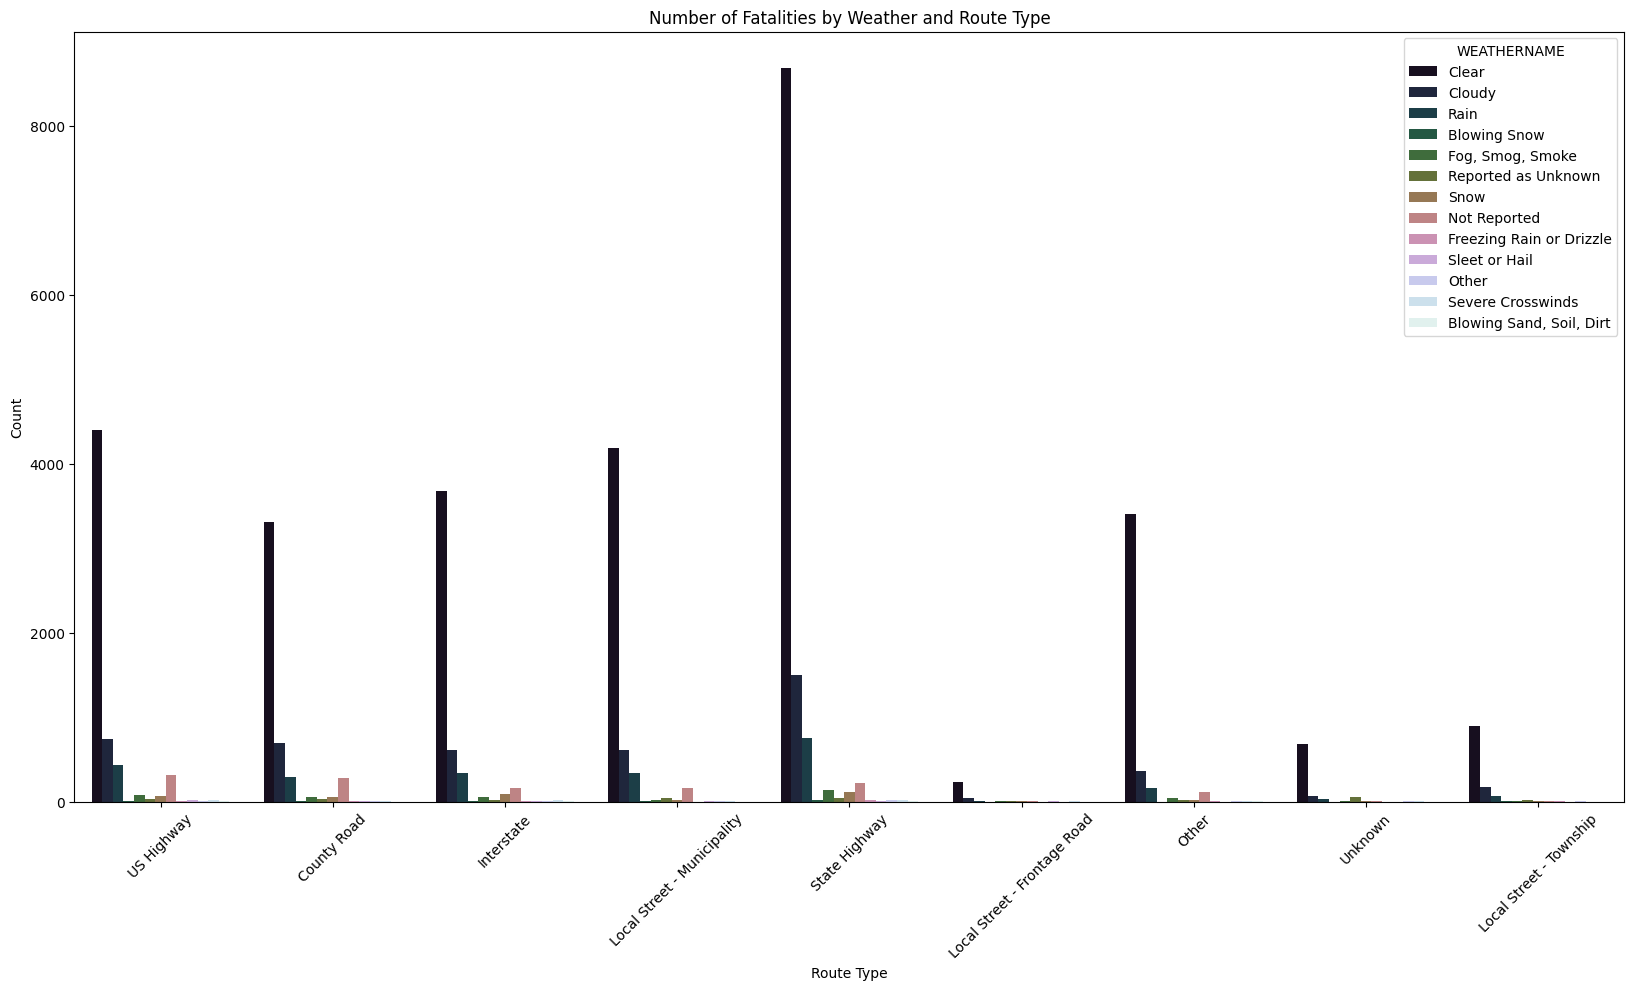

In [107]:
# Number of Fatalities by Weather and Route Type
plt.figure(figsize=(20, 10))
sns.countplot(x='ROUTENAME', hue='WEATHERNAME', data=df, palette='cubehelix')
plt.title('Number of Fatalities by Weather and Route Type')
plt.xlabel('Route Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

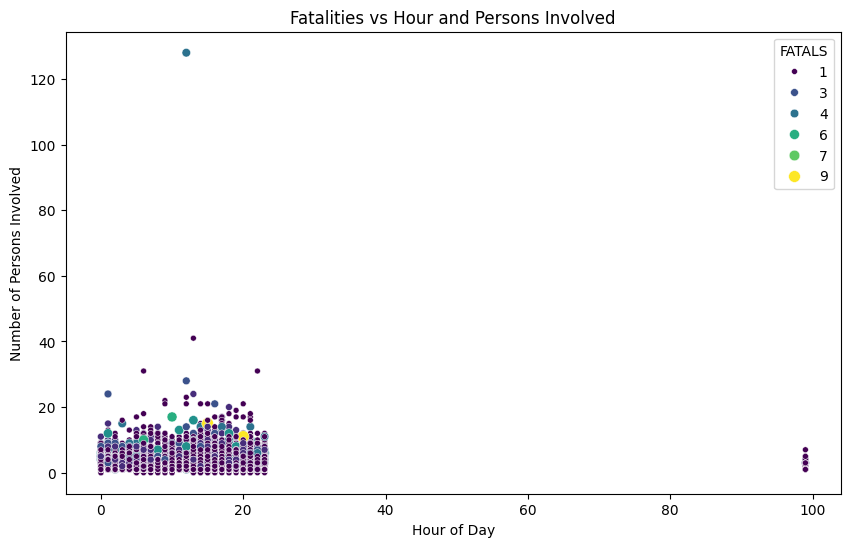

In [89]:
#  Scatterplot of Fatalities vs Hour and Persons Involved
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HOUR', y='PERSONS', hue='FATALS', data=df, palette='viridis', size='FATALS')
plt.title('Fatalities vs Hour and Persons Involved')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Persons Involved')
plt.show()

<Figure size 1000x600 with 0 Axes>

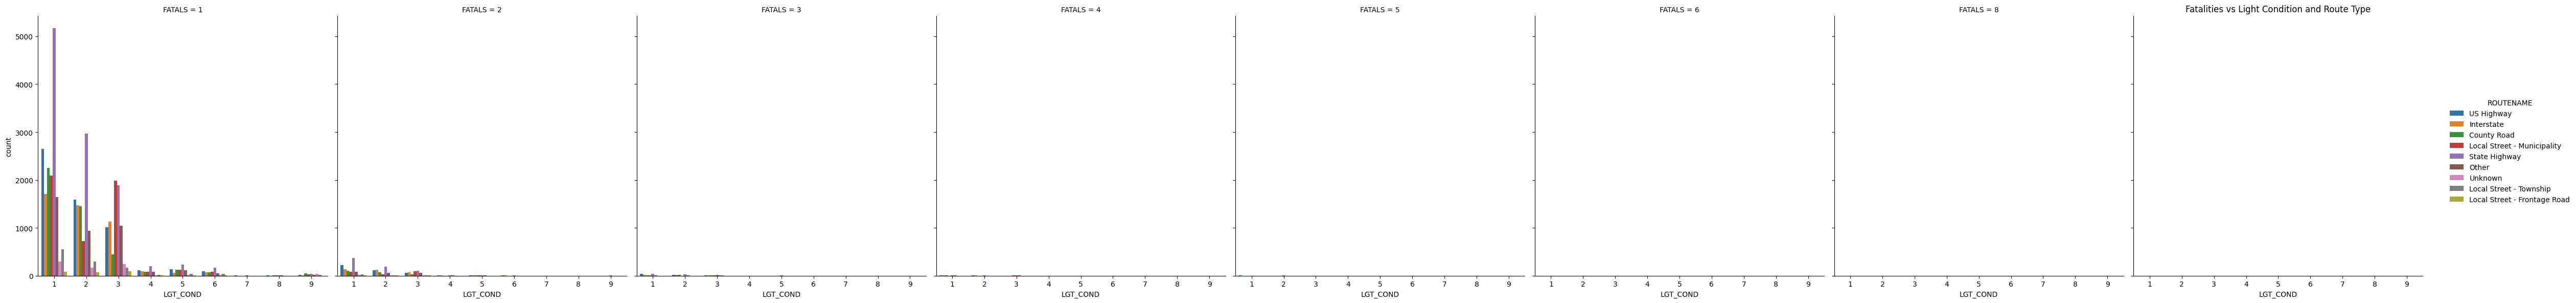

In [90]:
#  Fatalities vs Light Condition and Route Type
plt.figure(figsize=(10, 6))
sns.catplot(x='LGT_COND', hue='ROUTENAME', col='FATALS', data=df, kind='count', height=6, aspect=1)
plt.title('Fatalities vs Light Condition and Route Type')
plt.show()

<ipython-input-91-eb37ffd5b083>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SCH_BUS', data=df, palette='Blues')


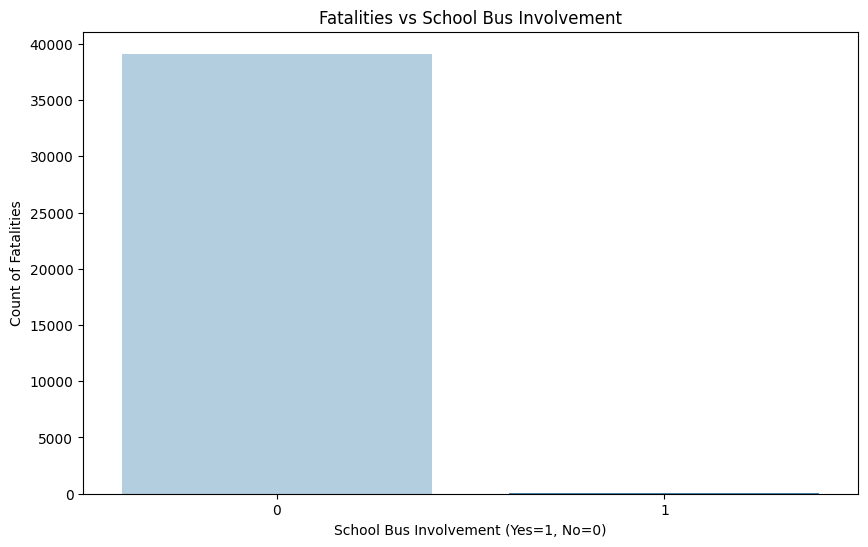

In [91]:
# 9. Fatalities vs School Bus Involvement
plt.figure(figsize=(10, 6))
sns.countplot(x='SCH_BUS', data=df, palette='Blues')
plt.title('Fatalities vs School Bus Involvement')
plt.xlabel('School Bus Involvement (Yes=1, No=0)')
plt.ylabel('Count of Fatalities')
plt.show()

<ipython-input-92-c67c6f7055d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HOURNAME', data=df, palette='coolwarm', order=df['HOURNAME'].value_counts().index)


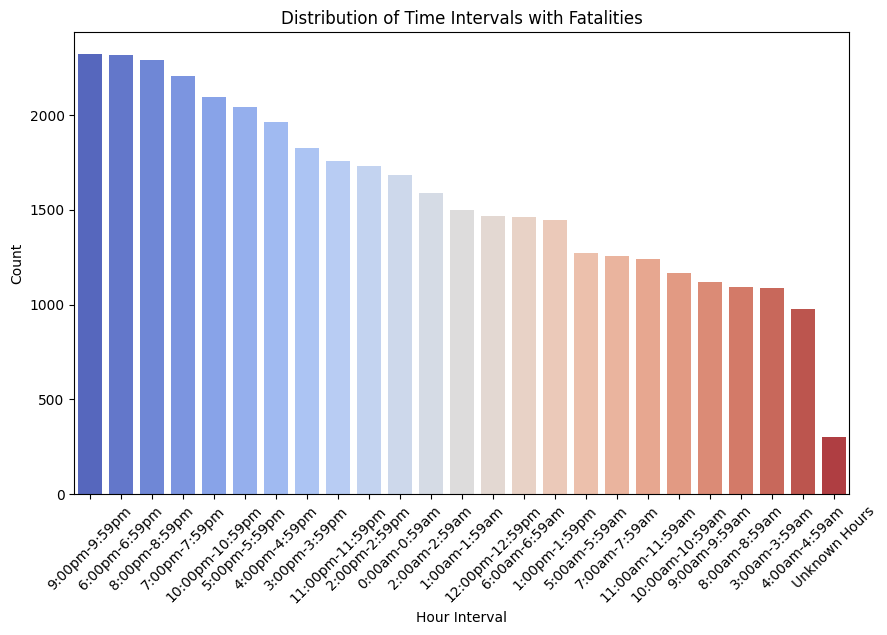

In [92]:

# Distribution of Time Intervals with Fatalities
plt.figure(figsize=(10, 6))
sns.countplot(x='HOURNAME', data=df, palette='coolwarm', order=df['HOURNAME'].value_counts().index)
plt.title('Distribution of Time Intervals with Fatalities')
plt.xlabel('Hour Interval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

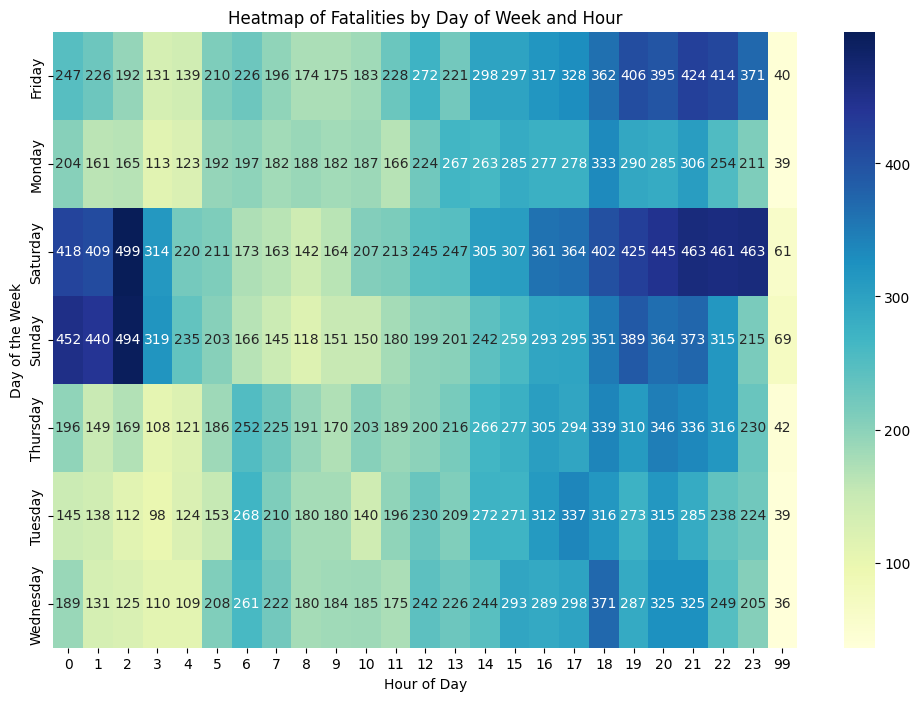

In [93]:
# Heatmap of Fatalities by Day of Week and Hour
df_pivot = df.pivot_table(index='DAY_WEEKNAME', columns='HOUR', values='FATALS', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap of Fatalities by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of the Week')
plt.show()

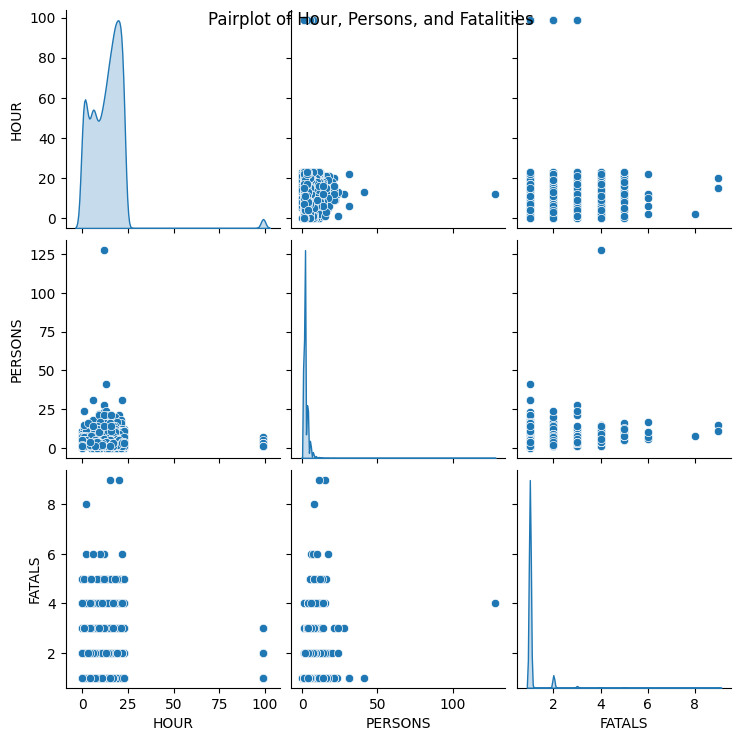

In [94]:
#  Pairplot of Hour, Persons, Fatalities
sns.pairplot(df[['HOUR', 'PERSONS', 'FATALS']], diag_kind='kde')
plt.suptitle('Pairplot of Hour, Persons, and Fatalities')
plt.show()

<ipython-input-95-438b456dd72a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DAY_WEEKNAME', y='NOT_HOUR', data=df, palette='Spectral')


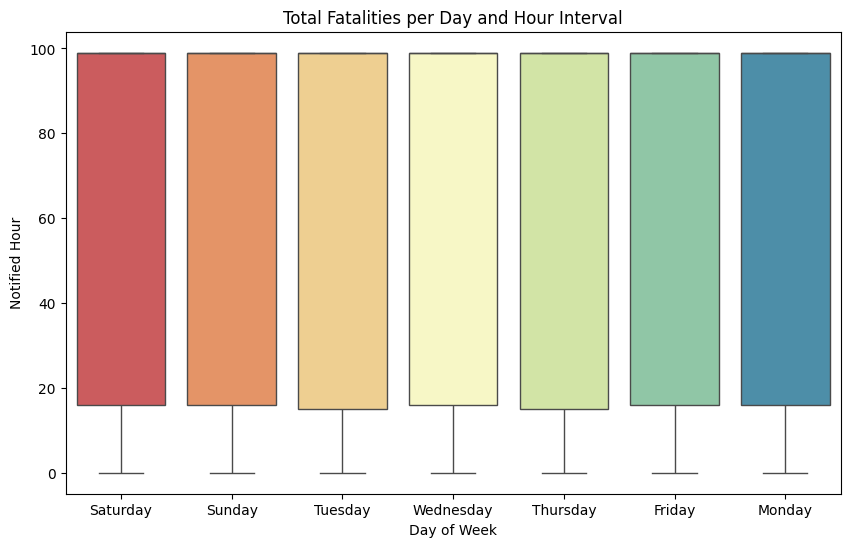

In [95]:

#Total Fatalities per Day and Hour Interval
plt.figure(figsize=(10, 6))
sns.boxplot(x='DAY_WEEKNAME', y='NOT_HOUR', data=df, palette='Spectral')
plt.title('Total Fatalities per Day and Hour Interval')
plt.xlabel('Day of Week')
plt.ylabel('Notified Hour')
plt.show()